In [120]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, Statistics, MLJ, Plots, Clustering, Distances

In [130]:
include("../src/utils.jl");
include("../src/opt.jl");

In [122]:
K, N, D, std, seed = 2, 20, 2, 0.1, 42

(2, 20, 2, 0.1, 42)

In [123]:
data = generate_points(K, N, D, std, seed);

In [124]:
data

20×2 Matrix{Float64}:
 0.944781   0.0257088
 0.0318814  0.949054
 1.0        0.00713455
 0.947587   0.0167818
 0.979184   0.0491799
 0.953758   0.0
 0.107315   0.959189
 0.0469588  1.0
 0.96102    0.00832767
 0.932577   0.0131243
 0.983427   0.038103
 0.0        0.968547
 0.029831   0.989615
 0.0446668  0.994495
 0.0640474  0.968483
 0.0428152  0.971533
 0.939346   0.0347519
 0.0687306  0.943517
 0.0461092  0.977822
 0.0696492  0.996869

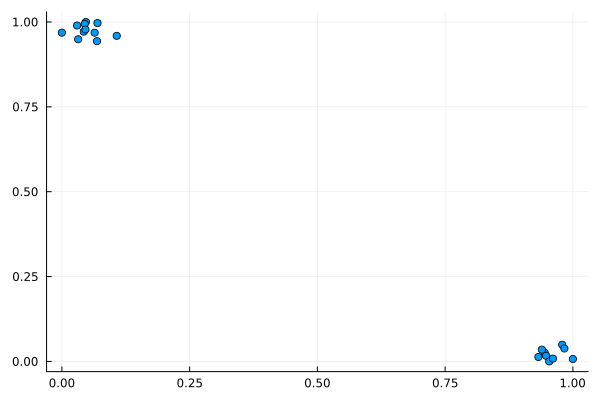

In [125]:
plot(data[:,1], data[:,2], seriestype=:scatter, legend=false)

In [139]:
assignments = gamma_formulation(data, K)
centroids = get_centroids(assignments, data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


2×2 Matrix{Float64}:
 0.482308  0.522243
 0.029831  0.989615

In [127]:
assignments

20×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 0.0  1.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0

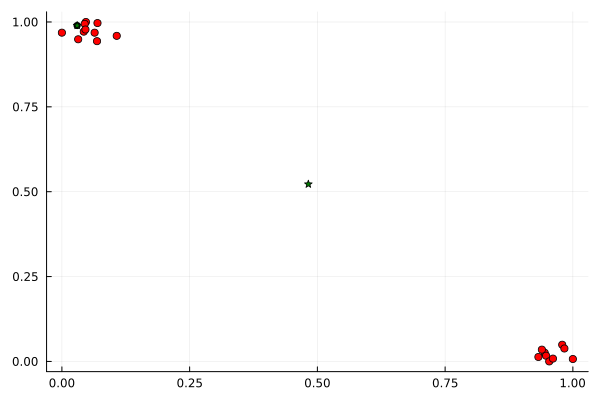

In [143]:
mapping = Dict(1=>:red, 2=>:black, 3=>:blue)
colors = [mapping[v] for v in argmax.(eachrow(assignments))];

plot(data[:,1], data[:,2], seriestype=:scatter, legend=false, color=colors)
plot!(centroids[:,1], centroids[:,2], seriestype=:scatter, legend=false, color=:green, markershape=:star5)